# Understanding the dynamics of cities through people's mobility

## Commute Networks

In [1]:
import collections
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

from utils import get_subset, get_network
import network_features as nf

In [2]:
SMALL_SIZE  = 15
MEDIUM_SIZE = 15
BIGGER_SIZE = 20

plt.rc('font', size        = MEDIUM_SIZE)   # controls default text sizes
plt.rc('axes', titlesize   = SMALL_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize   = MEDIUM_SIZE)   # fontsize of the x and y labels
plt.rc('xtick', labelsize  = SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize  = SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize  = SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize = BIGGER_SIZE)   # fontsize of the figure title

## Data exploration

In [2]:
br_checkin = pd.read_csv("br_checkin.csv")

sp_days    = get_subset(br_checkin, "Sao Paulo", time = "diary")
sp_months  = get_subset(br_checkin, "Sao Paulo", time = "monthly")

sp_fdays2012   = pd.read_csv("commute_features/SP_network_features2012_isolates_days.csv", index_col = 0)
sp_fdays2013   = pd.read_csv("commute_features/SP_network_features2013_isolates_days.csv", index_col = 0)

sp_fmonths2012 = pd.read_csv("commute_features/SP_network_features2012_isolates_months.csv", index_col = 0)
sp_fmonths2013 = pd.read_csv("commute_features/SP_network_features2013_isolates_months.csv", index_col = 0)

sp_gdays2013   = get_network(sp_days, "2012", features = False)
sp_gdays2013   = get_network(sp_days, "2013", features = False)

sp_gmonths2012 = get_network(sp_months, "2012", features = False)
sp_gmonths2013 = get_network(sp_months, "2013", features = False)

KeyboardInterrupt: 

In [9]:
jp_checkin = pd.read_csv("jp_checkin.csv")

tk_days    = get_subset(jp_checkin, "Tokyo", time = "diary")
tk_months  = get_subset(jp_checkin, "Tokyo", time = "monthly")

tk_fdays2012   = pd.read_csv("commute_features/TK_network_features2012_isolates_days.csv", index_col = 0)
tk_fdays2013   = pd.read_csv("commute_features/TK_network_features2013_isolates_days.csv", index_col = 0)

tk_fmonths2012 = pd.read_csv("commute_features/TK_network_features2012_isolates_months.csv", index_col = 0)
tk_fmonths2013 = pd.read_csv("commute_features/TK_network_features2013_isolates_months.csv", index_col = 0)

tk_gdays2013   = get_network(tk_days, "2012", features = False)
tk_gdays2013   = get_network(tk_days, "2013", features = False)

tk_gmonths2012 = get_network(tk_months, "2012", features = False)
tk_gmonths2013 = get_network(tk_months, "2013", features = False)

In [10]:
us_checkin = pd.read_csv("us_checkin.csv")

nyc_days   = get_subset(us_checkin, "New York", time = "diary")
nyc_months = get_subset(us_checkin, "New York", time = "monthly")

nyc_fdays2012   = pd.read_csv("commute_features/NYC_network_features2012_isolates_days.csv", index_col = 0)
nyc_fdays2013   = pd.read_csv("commute_features/NYC_network_features2013_isolates_days.csv", index_col = 0)

nyc_fmonths2012 = pd.read_csv("commute_features/NYC_network_features2012_isolates_months.csv", index_col = 0)
nyc_fmonths2013 = pd.read_csv("commute_features/NYC_network_features2013_isolates_months.csv", index_col = 0)

nyc_gdays2013   = get_network(nyc_days, "2012", features = False, remove_selfloop = True, remove_isolates = False)
nyc_gdays2013   = get_network(nyc_days, "2013", features = False, remove_selfloop = True, remove_isolates = False)

nyc_gmonths2012 = get_network(nyc_months, "2012", features = False, remove_selfloop = True, remove_isolates = False)
nyc_gmonths2013 = get_network(nyc_months, "2013", features = False, remove_selfloop = True, remove_isolates = False)

In [11]:
nyc_twoyears = pd.concat([nyc_fmonths2012, nyc_fmonths2013], axis = 0)

tk_twoyears = pd.concat([tk_fmonths2012, tk_fmonths2013], axis = 0)

sp_twoyears = pd.concat([sp_fmonths2012, sp_fmonths2013], axis = 0)

Text(0.5, 1.0, 'Commute Network - São Paulo')

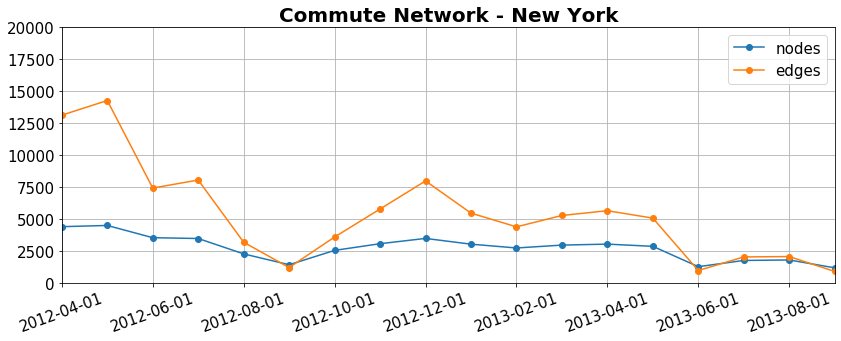

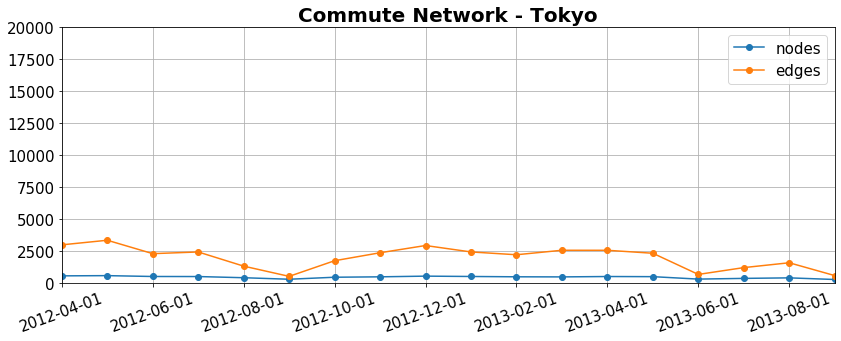

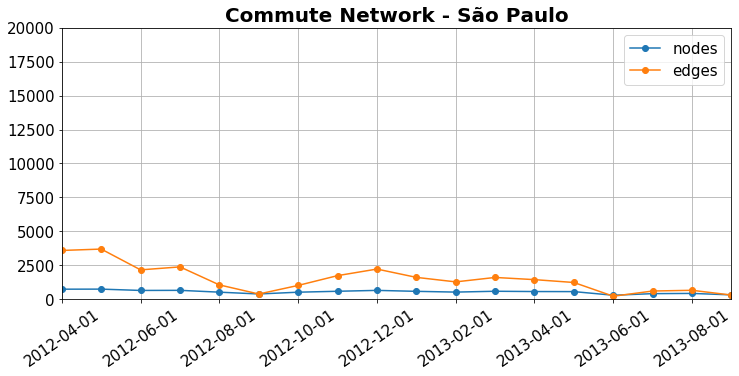

In [13]:
# fig, axes = plt.subplots(nrows = 3, ncols = 1, sharex = True, figsize = (30, 10), squeeze = False)

ax1 = nyc_twoyears[["nodes", "edges"]].plot(figsize = (12, 5), style = 'o-', rot = 20)#, ax = axes[0,0])
ax1.grid(True)
ax1.set_ylim(0, 20000)
ax1.set_title("Commute Network - New York", fontweight = "bold", fontsize = 20)

plt.tight_layout()
plt.savefig("plots/commute/nyc_nodes_edges.pdf")
######

ax2 = tk_twoyears[["nodes", "edges"]].plot(figsize = (12, 5), style = 'o-', rot = 20)#, ax = axes[1,0])
ax2.grid(True)
ax2.set_ylim(0, 20000)
ax2.set_title("Commute Network - Tokyo", fontweight = "bold", fontsize = 20)

plt.tight_layout()
plt.savefig("plots/commute/tyk_nodes_edges.pdf")
######

ax3 = sp_twoyears[["nodes", "edges"]].plot(figsize = (12, 5), style = 'o-', rot = 35)#, rot = 45, ax = axes[2,0])
ax3.grid(True)
ax3.set_ylim(0, 20000)
ax3.set_title("Commute Network - São Paulo", fontweight = "bold", fontsize = 20)

In [90]:
len(set(tk_months[tk_months["Date"] == "May 2012"]["VenueID"]))

562

In [87]:
len(set(tk_months[tk_months["Date"] == "Jul 2012"]["VenueID"]))

491

## Por que esse pico em maio de 2012?

Text(0.5, 1.0, 'Commute Network - São Paulo - March 2012')

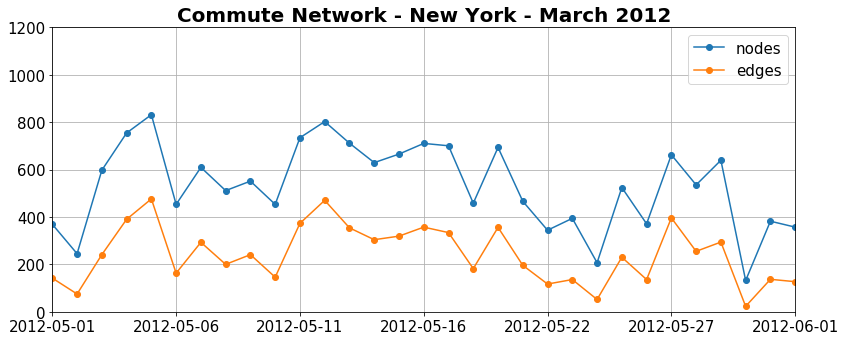

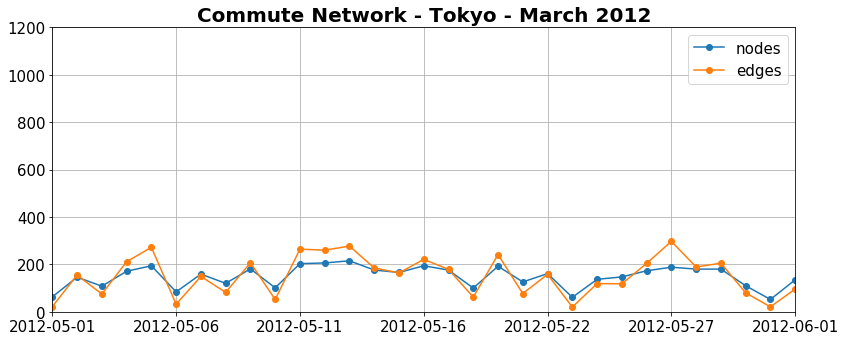

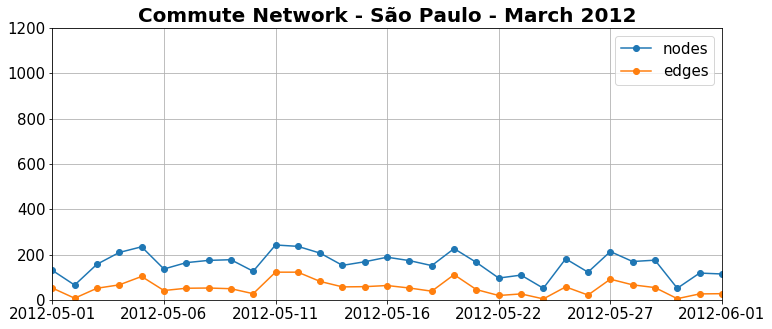

In [14]:
ax1 = nyc_fdays2012[(nyc_fdays2012.index >= "2012-05-01") & (nyc_fdays2012.index <= "2012-06-01")][["nodes", "edges"]].plot(figsize = (12, 5), style = 'o-')
ax1.grid(True)
ax1.set_ylim(0, 1200)
ax1.set_title("Commute Network - New York - March 2012", fontweight = "bold", fontsize = 20)

plt.tight_layout()
plt.savefig("plots/commute/nyc_nodes_edges_month_commute.pdf")
######

ax2 = tk_fdays2012[(tk_fdays2012.index >= "2012-05-01") & (tk_fdays2012.index <= "2012-06-01")][["nodes", "edges"]].plot(figsize = (12, 5), style = 'o-')
ax2.grid(True)
ax2.set_ylim(0, 1200)
ax2.set_title("Commute Network - Tokyo - March 2012", fontweight = "bold", fontsize = 20)

plt.tight_layout()
plt.savefig("plots/commute/tyk_nodes_edges_month_commute.pdf")
######

ax3 = sp_fdays2012[(sp_fdays2012.index >= "2012-05-01") & (sp_fdays2012.index <= "2012-06-01")][["nodes", "edges"]].plot(figsize = (12, 5), style = 'o-')
ax3.grid(True)
ax3.set_ylim(0, 1200)
ax3.set_title("Commute Network - São Paulo - March 2012", fontweight = "bold", fontsize = 20)

In [14]:
tk_days[(tk_days["Date"] == "May 13 2012")].groupby(by = ["VenueName", "Latitude", "Longitude"]).count().sort_values(by = "UserID", ascending = False)[:5]

UserID  VenueID  CountryCode  City  Date
VenueName     Latitude  Longitude                                           
Train Station 35.698596 139.773018     166      166          166   166   166
              35.690803 139.700279     136      136          136   136   136
              35.658522 139.701326      73       73           73    73    73
              35.729865 139.710956      67       67           67    67    67
              35.681379 139.766082      53       53           53    53    53

In [15]:
nyc_days[(nyc_days["Date"] == "May 13 2012")].groupby(by = ["VenueName", "Latitude", "Longitude"]).count().sort_values(by = "UserID", ascending = False)[:5]

,,,UserID,VenueID,CountryCode,City,Date
VenueName,Latitude,Longitude,,,,,
Pub,40.741002,-73.981709,115,115,115,115,115
Airport,40.645089,-73.784523,35,35,35,35,35
Train Station,40.750795,-73.993576,22,22,22,22,22
Baseball Stadium,40.829491,-73.926938,19,19,19,19,19
Train Station,40.752806,-73.977175,16,16,16,16,16


In [37]:
sp_days[(sp_days["Date"] == "May 13 2012")].groupby(by = ["VenueName", "Latitude", "Longitude"]).count().sort_values(by = "UserID", ascending = False)[:5]

UserID  VenueID  CountryCode  City  Date
VenueName      Latitude   Longitude                                           
Airport        -23.625967 -46.658721      45       45           45    45    45
Soccer Stadium -23.600115 -46.720095      29       29           29    29    29
Bakery         -23.556400 -46.659987      16       16           16    16    16
Mall           -23.623372 -46.698976      14       14           14    14    14
               -23.570824 -46.643595      10       10           10    10    10

In [29]:
nyc_fmonths2012

,nodes,edges,density,subgraphs,biggest_component,assortativity,diameter,max_degree,min_degree,std_degree,...,mean_eccentricity,std_eccentricity,max_betweenness,min_betweenness,mean_betweenness,std_betweenness,max_eigenvector,min_eigenvector,mean_eigenvector,std_eigenvector
2012-04-01,4392.0,13118.0,0.001360,78.0,4306.0,-0.055127,13.0,611.0,0.0,7.475865,...,9.132373,0.719728,0.156590,0.0,0.000666,0.004730,0.369777,-1.301010e-18,0.003457,0.014688
2012-05-01,4488.0,14264.0,0.001417,67.0,4408.0,-0.062809,10.0,705.0,0.0,7.975045,...,7.163793,0.618407,0.144748,0.0,0.000630,0.004567,0.477057,-1.952837e-18,0.003097,0.014602
2012-06-01,3531.0,7414.0,0.001190,144.0,3348.0,-0.049759,22.0,372.0,0.0,5.039932,...,16.780765,0.896875,0.204865,0.0,0.001016,0.006293,0.366065,-4.686043e-18,0.003841,0.016385
2012-07-01,3467.0,8043.0,0.001339,159.0,3291.0,-0.053002,13.0,445.0,0.0,5.620421,...,8.668186,0.803679,0.200920,0.0,0.000956,0.005974,0.466746,-4.755384e-18,0.003863,0.016538
2012-08-01,2263.0,3175.0,0.001240,281.0,1892.0,-0.040876,15.0,162.0,0.0,3.188688,...,10.779598,1.066770,0.192252,0.0,0.002051,0.009913,0.546936,-1.338158e-17,0.004956,0.020429
2012-09-01,1414.0,1194.0,0.001195,444.0,775.0,0.028590,18.0,50.0,0.0,1.801980,...,12.597419,1.428916,0.260860,0.0,0.006151,0.020141,0.404324,-1.304137e-17,0.007345,0.025559
2012-10-01,2538.0,3584.0,0.001113,308.0,2136.0,-0.017738,19.0,157.0,0.0,3.237983,...,12.152622,1.090100,0.205393,0.0,0.001930,0.009418,0.552730,-5.196827e-18,0.003475,0.019543
2012-11-01,3061.0,5774.0,0.001233,207.0,2816.0,-0.043185,12.0,297.0,0.0,4.341718,...,8.472301,0.853602,0.220855,0.0,0.001202,0.007194,0.463830,-2.905958e-18,0.004538,0.017496
2012-12-01,3474.0,7971.0,0.001321,192.0,3246.0,-0.069965,14.0,371.0,0.0,5.392055,...,9.300370,0.799750,0.167028,0.0,0.000951,0.006239,0.351171,-3.906538e-18,0.004172,0.016445


In [28]:
tk_fmonths2012

,nodes,edges,density,subgraphs,biggest_component,assortativity,diameter,max_degree,min_degree,std_degree,...,mean_eccentricity,std_eccentricity,max_betweenness,min_betweenness,mean_betweenness,std_betweenness,max_eigenvector,min_eigenvector,mean_eigenvector,std_eigenvector
2012-04-01,545.0,2971.0,0.020042,56.0,489.0,-0.165200,8.0,2456.0,0.0,41.515596,...,5.509202,0.633439,0.186773,0.0,0.003578,0.015194,0.511820,-4.867640e-17,0.009557,0.041756
2012-05-01,562.0,3331.0,0.021130,62.0,498.0,-0.157944,7.0,2858.0,0.0,47.110320,...,5.084337,0.549658,0.177343,0.0,0.003331,0.014228,0.504456,-5.116524e-17,0.009315,0.041141
2012-06-01,495.0,2282.0,0.018664,78.0,412.0,-0.158985,8.0,1785.0,0.0,33.305051,...,5.514563,0.636496,0.206991,0.0,0.004392,0.016323,0.521174,-4.431630e-17,0.010269,0.043758
2012-07-01,491.0,2414.0,0.020067,61.0,426.0,-0.176694,8.0,1843.0,0.0,34.806517,...,5.500000,0.621410,0.200456,0.0,0.004074,0.016870,0.510044,-2.318238e-17,0.010240,0.043952
2012-08-01,399.0,1305.0,0.016436,78.0,312.0,-0.222318,7.0,1000.0,0.0,20.055138,...,5.272436,0.554246,0.232652,0.0,0.005602,0.022308,0.547210,-3.468623e-17,0.011623,0.048695
2012-09-01,280.0,505.0,0.012929,88.0,192.0,-0.246902,7.0,252.0,0.0,7.514286,...,4.989583,0.645413,0.359136,0.0,0.009724,0.036708,0.503455,-6.448609e-17,0.016518,0.057433
2012-10-01,437.0,1729.0,0.018149,75.0,356.0,-0.190458,8.0,1156.0,0.0,24.347826,...,5.373596,0.607333,0.263534,0.0,0.004885,0.020463,0.504662,-3.252437e-17,0.011638,0.046399
2012-11-01,469.0,2353.0,0.021440,55.0,413.0,-0.178948,6.0,1811.0,0.0,34.238806,...,4.910412,0.520023,0.198105,0.0,0.004160,0.016874,0.504790,-5.669801e-17,0.010782,0.044899
2012-12-01,523.0,2918.0,0.021377,64.0,459.0,-0.172470,8.0,2417.0,0.0,39.074570,...,5.394336,0.586012,0.209309,0.0,0.003670,0.016117,0.536493,-5.155051e-17,0.009599,0.042660


### Plotando a distribuição dos graus dos grafos

In [17]:
def degree_sequence(lgraphs):
    dg = []

    for date, graph in lgraphs:
        degree_sequence = sorted([d for n, d in graph.degree(weight = 'weight')], reverse = True)
        degreeCount = collections.Counter(degree_sequence)

        dg.append((date, degreeCount))
        
    return dg


def plot_graphs(lgraphs, city, ylim = None):
    
    dg = degree_sequence(lgraphs)
        
    for date, degree in dg:
        df = pd.DataFrame.from_dict(degree, orient = "index")
        ax = df.plot(kind = 'bar', legend = False, figsize = (12, 5))
        ax.invert_xaxis()

        ax.set_title(f'Commute Network - {city} - {date}', fontweight = "bold", fontsize = 20)
        
        if ylim != None:
            ax.set_ylim(ylim)

        tick_custom = df.index 
        plt.xticks(np.arange(len(tick_custom))[::10], tick_custom[::10], rotation = 0)
        
        filename = f"{city}_weight_{date}_commute.pdf"
        plt.tight_layout()
        plt.savefig("plots/commute/" + filename)

In [18]:
def get_places(graph, data, k):
    dg = sorted([d for n, d in graph.degree(weight = 'weight')], reverse = True)
    
    degrees = dg[:k]
    
    places = pd.DataFrame(columns = ["Latitude", "Longitude", "VenueID", "VenueName", "Weight"])
    
    for deg in degrees:
        dg_node = [n for n, d in graph.degree(weight = 'weight') if d == deg][0]
        p = data[data["VenueID"] == dg_node].iloc[0, :]
        
        places = places.append({"Latitude": p["Latitude"], "Longitude": p["Longitude"], 
                                "VenueID": p["VenueID"], "VenueName": p["VenueName"], 
                               "Weight": deg}, ignore_index = True)
        
    return places

In [19]:
tk_weight = pd.DataFrame(columns = ["Latitude", "Longitude", "VenueID", "VenueName", "Weight", "Date"])

for date, graph in tk_gmonths2012:
    p = get_places(graph, tk_months, k = 5)
    
    for i in range(len(p)):
        tk_weight = tk_weight.append({"Latitude": p["Latitude"][i], "Longitude": p["Longitude"][i], 
                                    "VenueID": p["VenueID"][i], "VenueName": p["VenueName"][i], 
                                   "Weight": p["Weight"][i], "Date": date}, ignore_index = True)

In [20]:
nyc_weight = pd.DataFrame(columns = ["Latitude", "Longitude", "VenueID", "VenueName", "Weight", "Date"])

for date, graph in nyc_gmonths2012:
    p = get_places(graph, nyc_months, k = 5)
    
    for i in range(len(p)):
        nyc_weight = nyc_weight.append({"Latitude": p["Latitude"][i], "Longitude": p["Longitude"][i], 
                                    "VenueID": p["VenueID"][i], "VenueName": p["VenueName"][i], 
                                   "Weight": p["Weight"][i], "Date": date}, ignore_index = True)

In [51]:
nyc_weight[nyc_weight["Date"] == "May 2012"]

,Latitude,Longitude,VenueID,VenueName,Weight,Date
5,40.750795,-73.993576,42911d00f964a520f5231fe3,Train Station,705,May 2012
6,40.645089,-73.784523,43a52546f964a520532c1fe3,Airport,589,May 2012
7,40.752806,-73.977175,42829c80f964a5206a221fe3,Train Station,556,May 2012
8,40.773839,-73.871220,4ace6c89f964a52078d020e3,Airport,489,May 2012
9,40.756490,-73.986268,49b7ed6df964a52030531fe3,Plaza,443,May 2012


In [52]:
tk_weight[tk_weight["Date"] == "May 2012"]

,Latitude,Longitude,VenueID,VenueName,Weight,Date
5,35.698596,139.773018,4b19f917f964a520abe623e3,Train Station,2858,May 2012
6,35.690803,139.700279,4b0587a6f964a5203d9e22e3,Train Station,2814,May 2012
7,35.658522,139.701326,4b093eeff964a520e51423e3,Train Station,1572,May 2012
8,35.729865,139.710956,4b243a7df964a520356424e3,Train Station,1537,May 2012
9,35.681379,139.766082,4b0587a6f964a5203e9e22e3,Train Station,1299,May 2012


In [73]:
tk_gmonths2012[1]

('May 2012', <networkx.classes.graph.Graph at 0x7f4477f48a20>)

In [80]:
graph  = tk_gmonths2012[1][1]

bg     = nf.biggest_component(graph)
bgraph = graph.subgraph(bg)
metric = nx.eigenvector_centrality_numpy(graph, weight = 'weight')
# metric = nx.closeness_centrality(graph, distance = 'weight')
# metric = nx.betweenness_centrality(bgraph)

In [81]:
max(metric.values())

0.5044557653603521

In [82]:
for k, v in metric.items():
    for p in tk_weight[tk_weight["Date"] == "May 2012"]["VenueID"]:
        if k == p:
            print(k, v)

4b0587a6f964a5203e9e22e3 0.27806054210744
4b0587a6f964a5203d9e22e3 0.5044557653603521
4b093eeff964a520e51423e3 0.331905936584791
4b243a7df964a520356424e3 0.3400420711439821
4b19f917f964a520abe623e3 0.4904507063140265


In [22]:
for p1, p2, v in sorted(nyc_gmonths2012[3][1].edges(data=True), key= lambda x: x[2]['weight'],reverse=True):
    if p1 == nyc_weight[nyc_weight["Date"] == "May 2012"]["VenueID"].iloc[0]:
        print(p1, p2, v)
        
        print(nyc_months[nyc_months["VenueID"] == p1][["Latitude", "Longitude", "VenueName"]].iloc[0])
        print(nyc_months[nyc_months["VenueID"] == p2][["Latitude", "Longitude", "VenueName"]].iloc[0])

42911d00f964a520f5231fe3 49d60947f964a520a85c1fe3 {'weight': 5}
Latitude           40.7508
Longitude         -73.9936
VenueName    Train Station
Name: 36, dtype: object
Latitude              40.7565
Longitude            -73.8461
VenueName    Baseball Stadium
Name: 1040, dtype: object
42911d00f964a520f5231fe3 4ae6363ef964a520aba521e3 {'weight': 4}
Latitude           40.7508
Longitude         -73.9936
VenueName    Train Station
Name: 36, dtype: object
Latitude     40.7505
Longitude   -73.9935
VenueName    Stadium
Name: 111, dtype: object
42911d00f964a520f5231fe3 42829c80f964a5206a221fe3 {'weight': 2}
Latitude           40.7508
Longitude         -73.9936
VenueName    Train Station
Name: 36, dtype: object
Latitude           40.7528
Longitude         -73.9772
VenueName    Train Station
Name: 79, dtype: object
42911d00f964a520f5231fe3 4a9b03dcf964a520013420e3 {'weight': 1}
Latitude           40.7508
Longitude         -73.9936
VenueName    Train Station
Name: 36, dtype: object
Latitude       

In [25]:
for p1, p2, v in sorted(tk_gmonths2012[3][1].edges(data=True), key= lambda x: x[2]['weight'],reverse=True):
    if p1 == tk_weight[tk_weight["Date"] == "May 2012"]["VenueID"].iloc[0]:
        print(p1, p2, v)
        
        print(tk_months[tk_months["VenueID"] == p1][["Latitude", "Longitude", "VenueName"]].iloc[0])
        print(tk_months[tk_months["VenueID"] == p2][["Latitude", "Longitude", "VenueName"]].iloc[0])

4b19f917f964a520abe623e3 4b18bed2f964a5207dd523e3 {'weight': 7}
Latitude           35.6986
Longitude          139.773
VenueName    Train Station
Name: 5, dtype: object
Latitude           35.7023
Longitude          139.745
VenueName    Train Station
Name: 32, dtype: object
4b19f917f964a520abe623e3 4b1b6114f964a5201efb23e3 {'weight': 6}
Latitude           35.6986
Longitude          139.773
VenueName    Train Station
Name: 5, dtype: object
Latitude           35.7129
Longitude          139.704
VenueName    Train Station
Name: 213, dtype: object
4b19f917f964a520abe623e3 4b132e42f964a520339523e3 {'weight': 5}
Latitude           35.6986
Longitude          139.773
VenueName    Train Station
Name: 5, dtype: object
Latitude           35.6676
Longitude          139.632
VenueName    Train Station
Name: 285, dtype: object
4b19f917f964a520abe623e3 4b0f84e5f964a520e56223e3 {'weight': 4}
Latitude           35.6986
Longitude          139.773
VenueName    Train Station
Name: 5, dtype: object
Latitude   

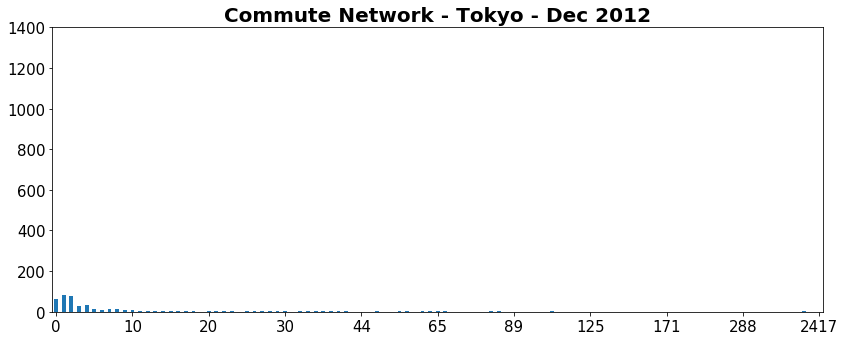

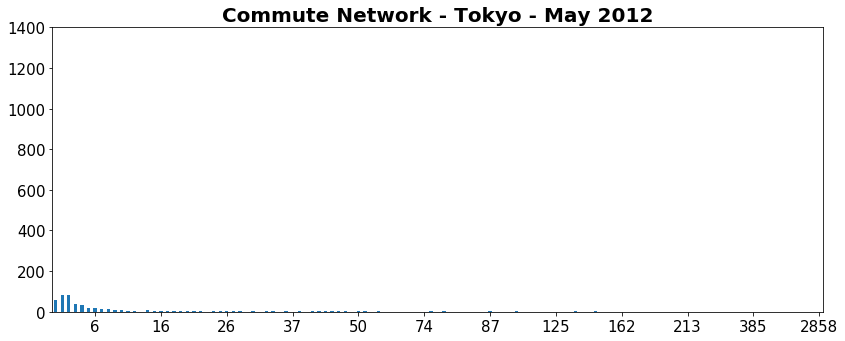

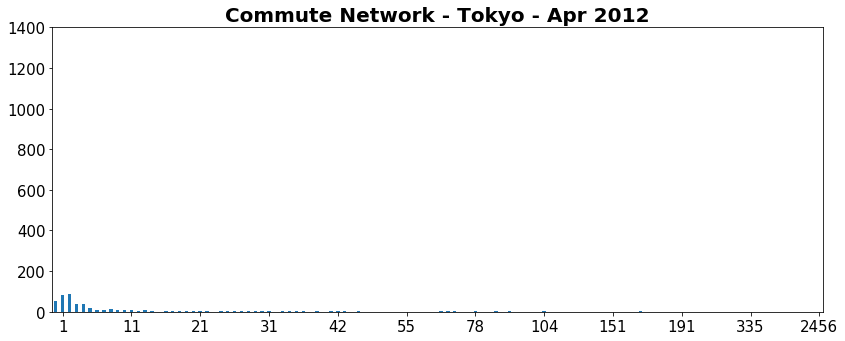

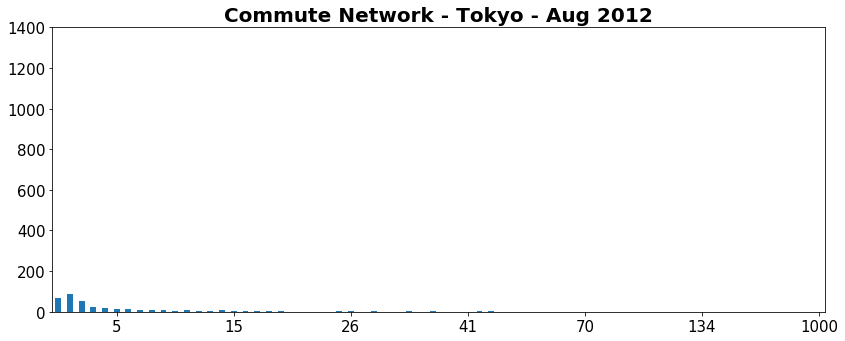

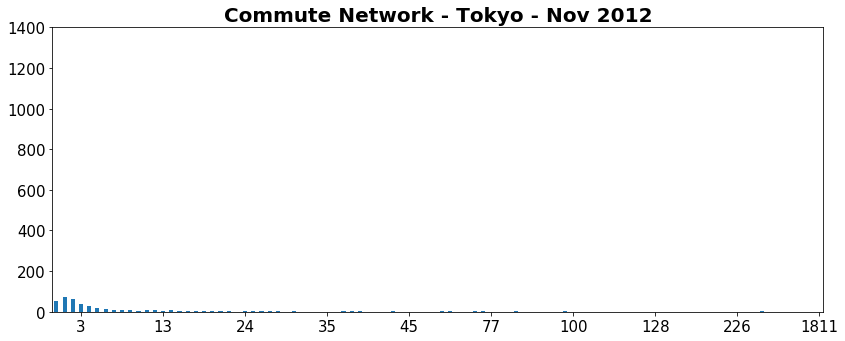

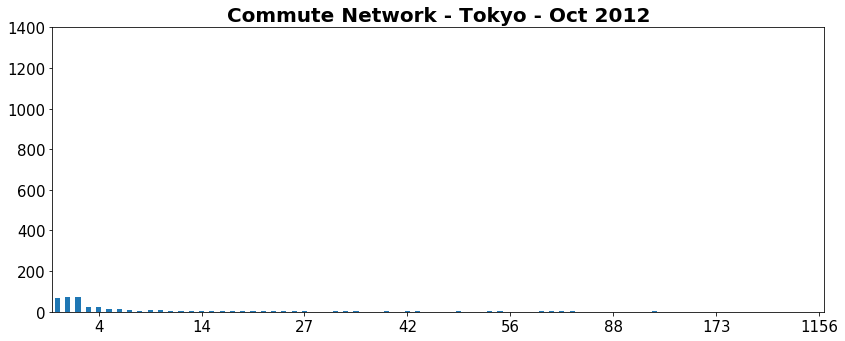

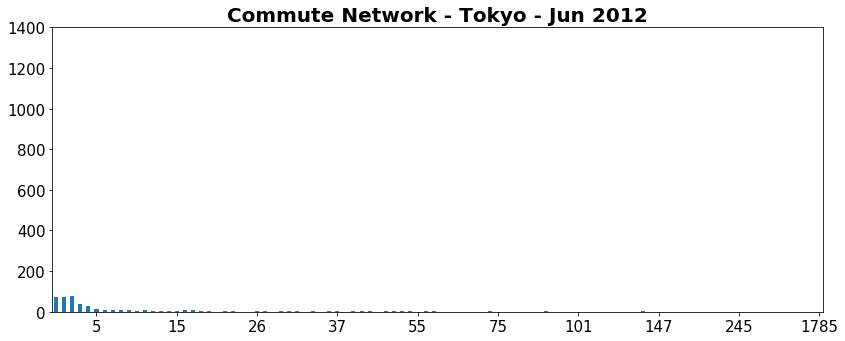

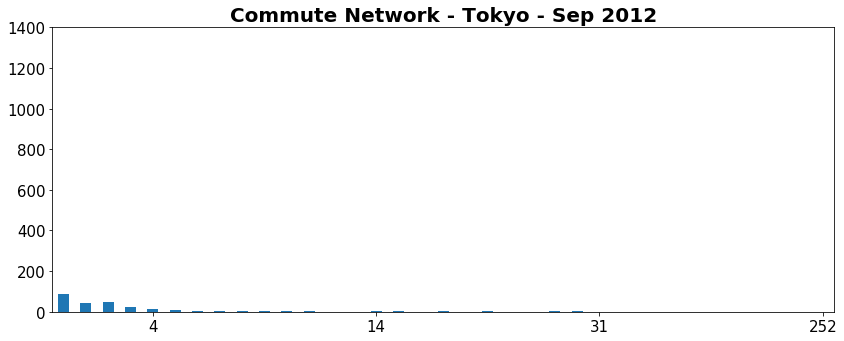

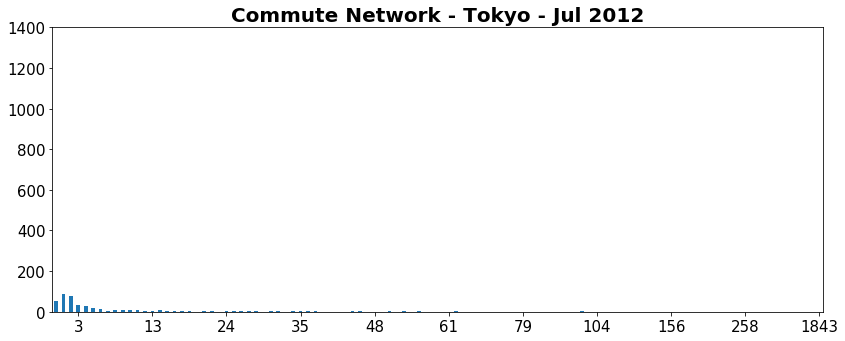

In [26]:
plot_graphs(tk_gmonths2012, "Tokyo", ylim = (0, 1400))

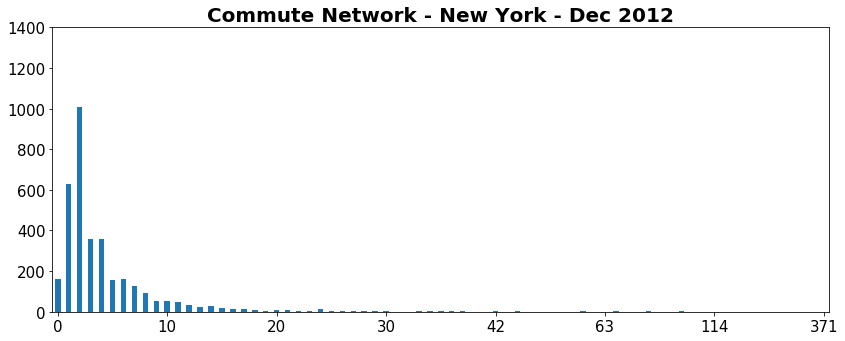

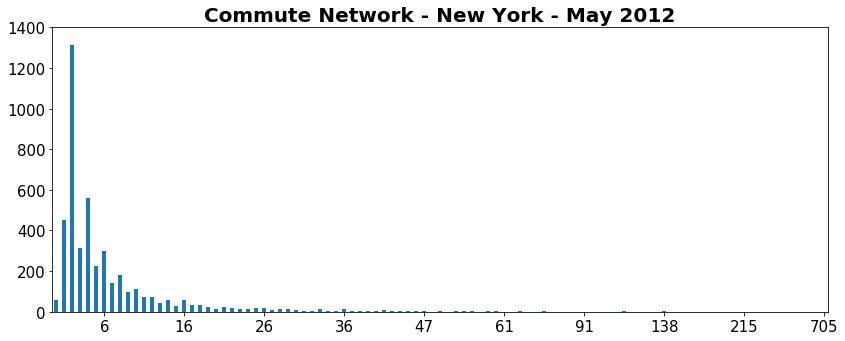

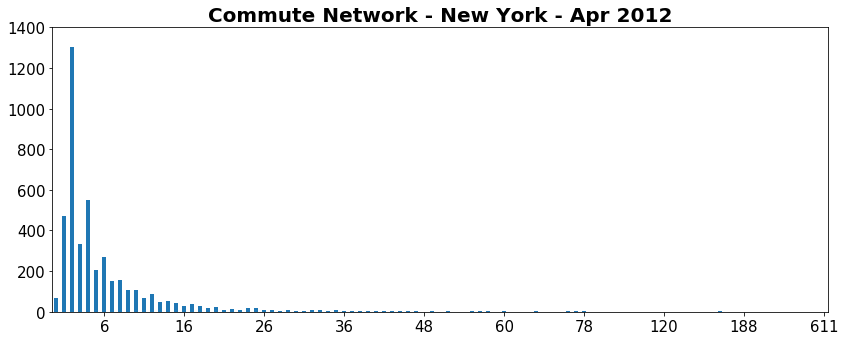

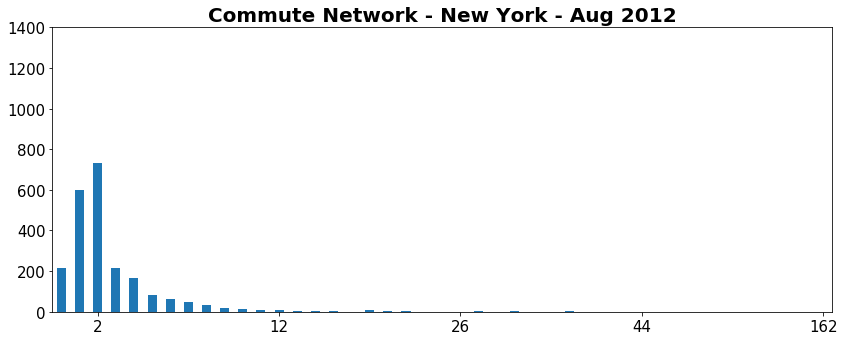

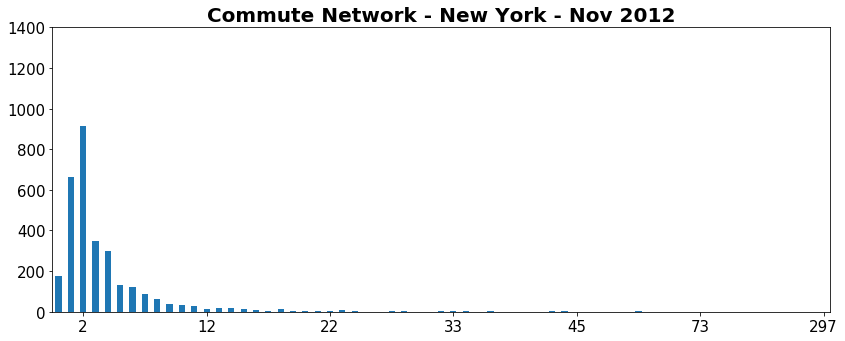

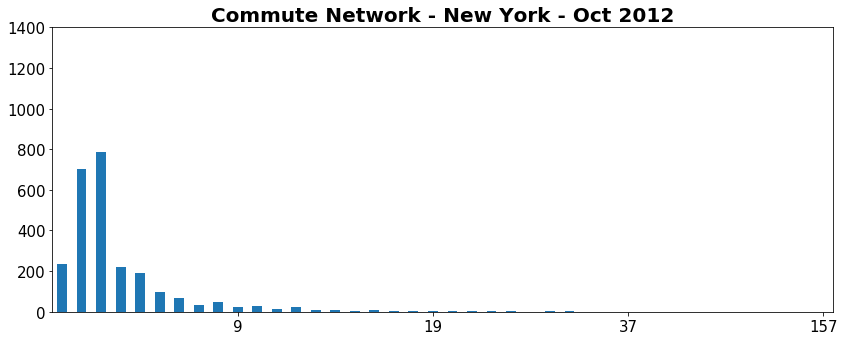

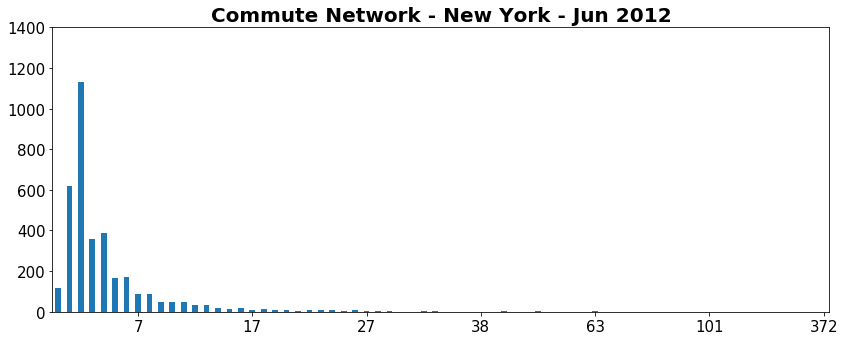

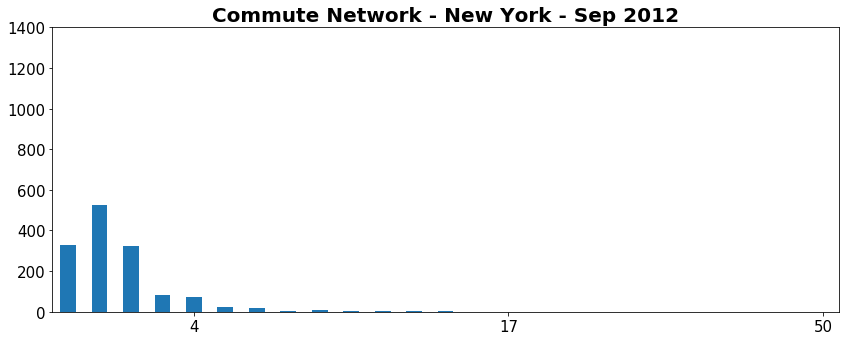

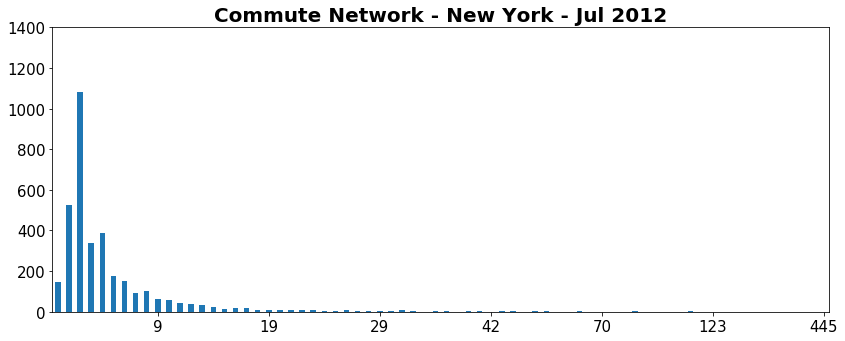

In [27]:
plot_graphs(nyc_gmonths2012, "New York", ylim = (0, 1400))

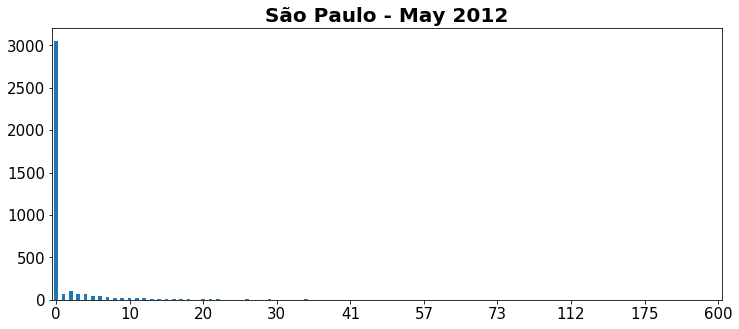

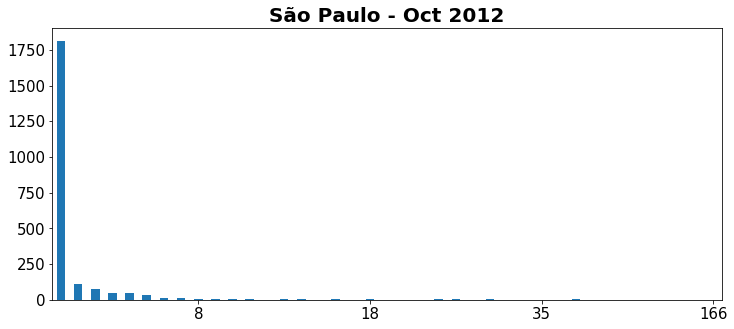

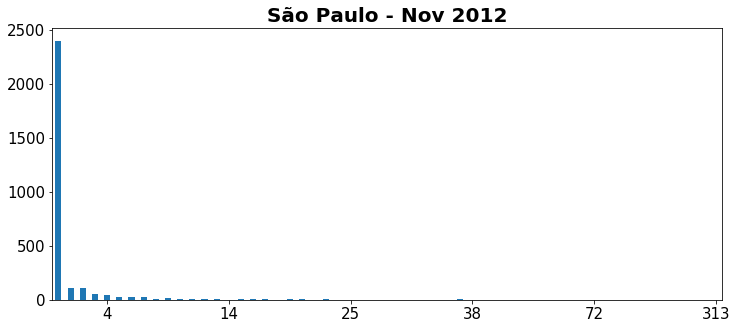

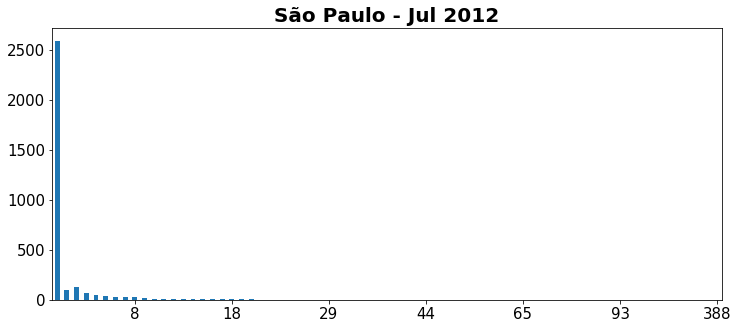

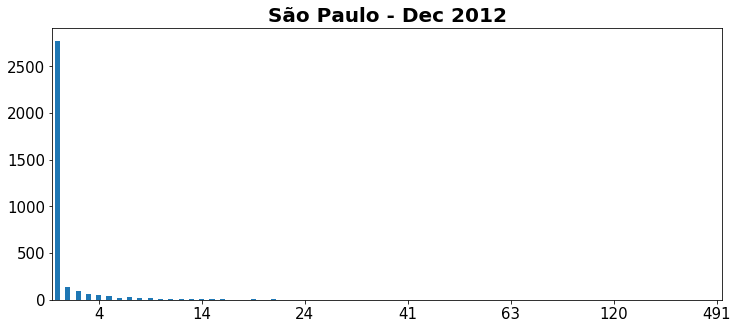

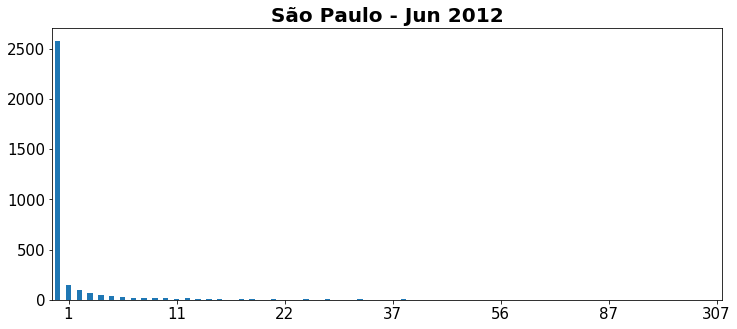

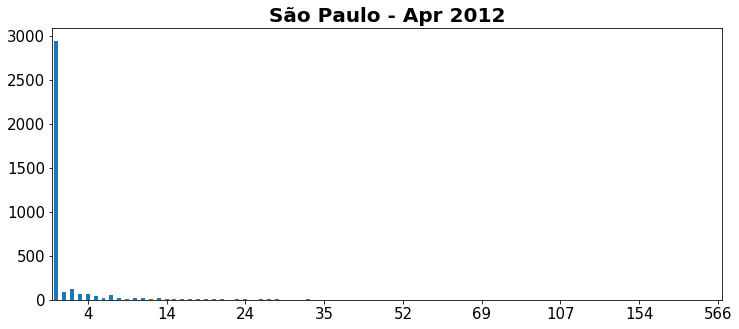

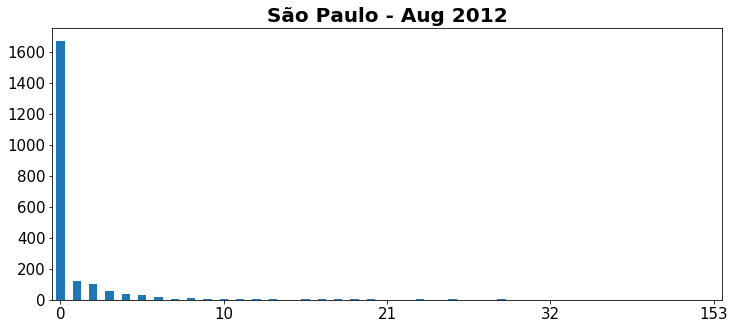

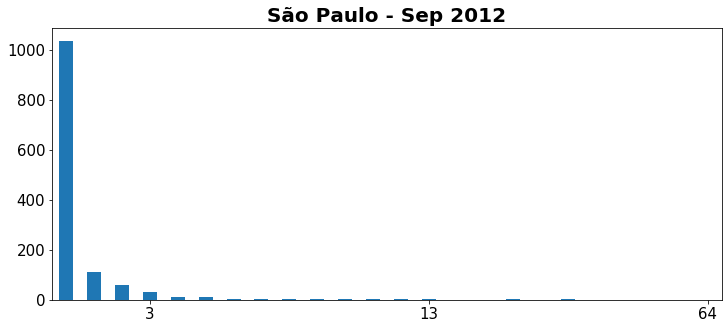

In [45]:
plot_graphs(sp_gmonths2012, "São Paulo")

### Subgraphs and connected components

In [165]:
def plot_components(city, data):
    
    components             = data[["biggest_component", "nodes"]]
    components["isolated"] = (data["nodes"] - data["biggest_component"])
    
    index = [str(p).split(" ")[0] for p in data.index]
    
    ax = components[["biggest_component", "isolated"]].plot(kind = "bar", figsize = (12, 5), stacked = True, rot = 45)
    
    plt.xticks(range(len(components)), index)
    
#     ax.legend(loc="lower left")
    ax.set_ylim(0, 5000)
    
    ax.set_title(city, fontweight = "bold", fontsize = 20)

/home/isadora/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


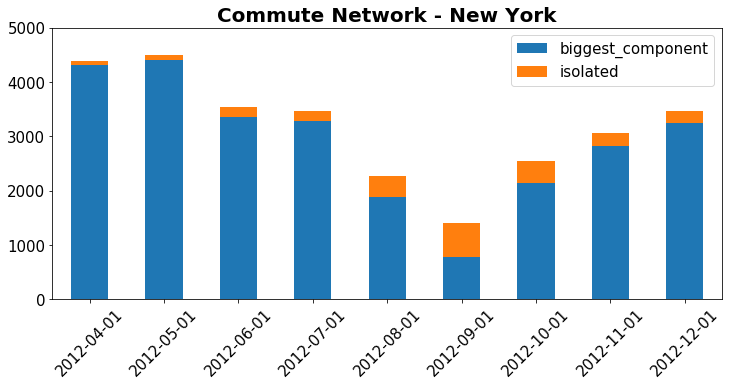

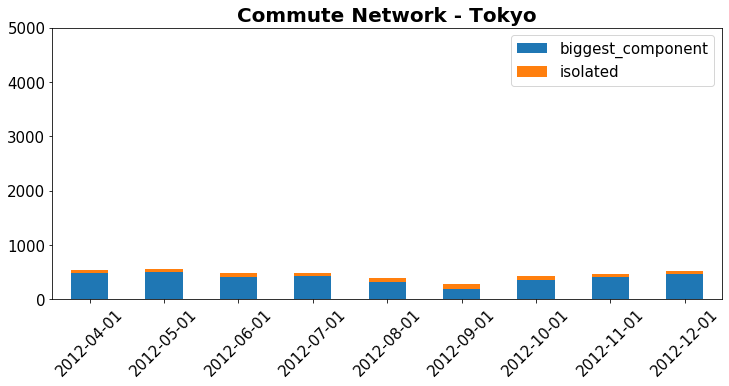

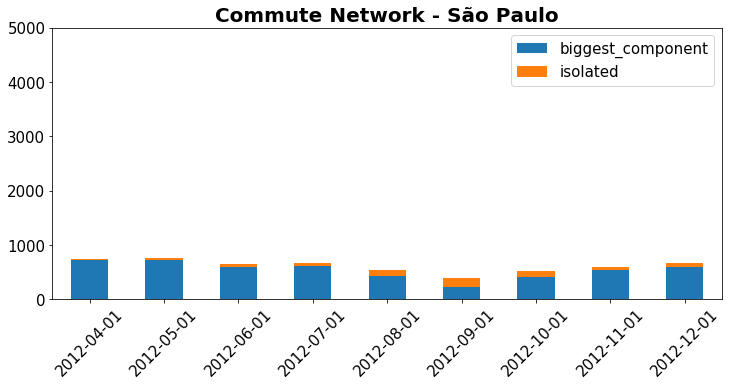

In [166]:
plot_components("Commute Network - New York", nyc_fmonths2012)

plot_components("Commute Network - Tokyo", tk_fmonths2012)

plot_components("Commute Network - São Paulo", sp_fmonths2012)

In [91]:
nx.write_gexf(tk_gmonths2012[1][1], "may2012_commute.gexf")

In [167]:
tk_fmonths2012["subgraphs"]

2012-04-01    56.0
2012-05-01    62.0
2012-06-01    78.0
2012-07-01    61.0
2012-08-01    78.0
2012-09-01    88.0
2012-10-01    75.0
2012-11-01    55.0
2012-12-01    64.0
Name: subgraphs, dtype: float64

In [168]:
tk_fmonths2012["biggest_component"]/tk_fmonths2012["nodes"]

2012-04-01    0.897248
2012-05-01    0.886121
2012-06-01    0.832323
2012-07-01    0.867617
2012-08-01    0.781955
2012-09-01    0.685714
2012-10-01    0.814645
2012-11-01    0.880597
2012-12-01    0.877629
dtype: float64

In [169]:
nyc_fmonths2012["biggest_component"]/nyc_fmonths2012["nodes"]

2012-04-01    0.980419
2012-05-01    0.982175
2012-06-01    0.948173
2012-07-01    0.949236
2012-08-01    0.836058
2012-09-01    0.548091
2012-10-01    0.841608
2012-11-01    0.919961
2012-12-01    0.934370
dtype: float64

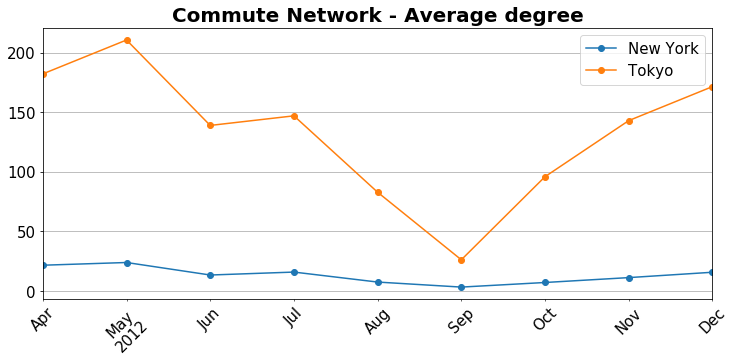

In [173]:
ax = nyc_fmonths2012["mean_degree"].plot(figsize = (12, 5), style = 'o-', rot = 45)
# ax1.grid(True)
# ax1.set_title("New York", fontweight = "bold", fontsize = 20)

tk_fmonths2012["mean_degree"].plot(figsize = (12, 5), style = 'o-', rot = 45)
# ax2.grid(True)
# ax2.set_title("Tokyo", fontweight = "bold", fontsize = 20)

# sp_fmonths2012["mean_degree"].plot(figsize = (12, 5), style = 'o-', rot = 45)
ax.grid(True)
ax.set_title("Commute Network - Average degree", fontweight = "bold", fontsize = 20)

ax.legend(["New York", "Tokyo"])#, "São Paulo"])

### Assortativity

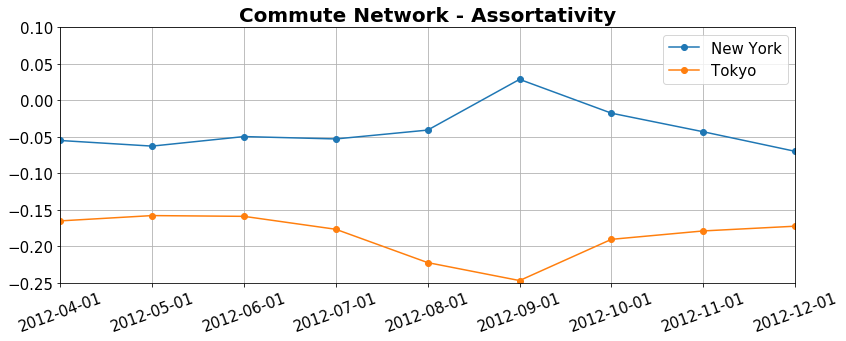

In [31]:
ax = nyc_fmonths2012["assortativity"].plot(figsize = (12, 5), style = 'o-')
# ax1.grid(True)
# ax1.set_title("New York", fontweight = "bold", fontsize = 20)

tk_fmonths2012["assortativity"].plot(figsize = (12, 5), style = 'o-', rot = 20)
# ax2.grid(True)
# ax2.set_title("Tokyo", fontweight = "bold", fontsize = 20)

# sp_fmonths2012["assortativity"].plot(figsize = (12, 5), style = 'o-')
ax.grid(True)
ax.set_title("Commute Network - Assortativity", fontweight = "bold", fontsize = 20)
ax.set_ylim((-0.25, 0.1))

ax.legend(["New York", "Tokyo"])#, "São Paulo"])

plt.tight_layout()
plt.savefig("plots/commute/assortavity_commute.pdf")

### Eccentricity

In [34]:
def get_place_eccentricity(graph, data, k):
    bg     = nf.biggest_component(graph)
    bgraph = graph.subgraph(bg)
    ecc    = nx.eccentricity(bgraph)
        
    dg = sorted([d for n, d in ecc.items()], reverse = True)
    
    degrees = dg[:k]
    
    places = pd.DataFrame(columns = ["UserID", "Latitude", "Longitude", "VenueID", "VenueName", "Ecc"])
    
    for deg in degrees:
        dg_node = [n for n, d in ecc.items() if d == deg][0]
        p = data[data["VenueID"] == dg_node].iloc[0, :]
        
        places = places.append({"UserID": p["UserID"], "Latitude": p["Latitude"], "Longitude": p["Longitude"], 
                                "VenueID": p["VenueID"], "VenueName": p["VenueName"], 
                               "Ecc": deg}, ignore_index = True)
        
    return places

In [35]:
nyc_ecc = pd.DataFrame(columns = ["UserID", "Latitude", "Longitude", "VenueID", "VenueName", "Ecc", "Date"])

for date, graph in nyc_gmonths2012:
    p = get_place_eccentricity(graph, nyc_months, k = 5)
    
    for i in range(len(p)):
        nyc_ecc = nyc_ecc.append({"UserID": p["UserID"][i], "Latitude": p["Latitude"][i], 
                                      "Longitude": p["Longitude"][i], "VenueID": p["VenueID"][i], 
                                      "VenueName": p["VenueName"][i], 
                                        "Ecc": p["Ecc"][i], "Date": date}, ignore_index = True)

In [36]:
tk_ecc = pd.DataFrame(columns = ["UserID", "Latitude", "Longitude", "VenueID", "VenueName", "Ecc", "Date"])

for date, graph in tk_gmonths2012:
    p = get_place_eccentricity(graph, tk_months, k = 5)
    
    for i in range(len(p)):
        tk_ecc = tk_ecc.append({"UserID": p["UserID"][i], "Latitude": p["Latitude"][i], 
                                      "Longitude": p["Longitude"][i], "VenueID": p["VenueID"][i], 
                                      "VenueName": p["VenueName"][i], 
                                        "Ecc": p["Ecc"][i], "Date": date}, ignore_index = True)

In [47]:
tk_ecc#[tk_ecc["Date"] == "Aug 2012"]

,UserID,Latitude,Longitude,VenueID,VenueName,Ecc,Date
0,113873,35.659335,139.667210,4b1f930bf964a520092724e3,Japanese Restaurant,8,Dec 2012
1,113873,35.659335,139.667210,4b1f930bf964a520092724e3,Japanese Restaurant,8,Dec 2012
2,73658,35.674366,139.710596,4b0587bbf964a52095a122e3,Salon / Barbershop,7,Dec 2012
3,73658,35.674366,139.710596,4b0587bbf964a52095a122e3,Salon / Barbershop,7,Dec 2012
4,73658,35.674366,139.710596,4b0587bbf964a52095a122e3,Salon / Barbershop,7,Dec 2012
5,64760,35.660634,139.695567,4b0587b4f964a520a8a022e3,Bookstore,7,May 2012
6,64760,35.660634,139.695567,4b0587b4f964a520a8a022e3,Bookstore,7,May 2012
7,64760,35.660634,139.695567,4b0587b4f964a520a8a022e3,Bookstore,7,May 2012
8,218984,35.663539,139.732579,4b2a06fff964a520c7a424e3,Pub,6,May 2012
9,218984,35.663539,139.732579,4b2a06fff964a520c7a424e3,Pub,6,May 2012


In [48]:
nyc_ecc#[nyc_ecc["Date"] == "Aug 2012"]

,UserID,Latitude,Longitude,VenueID,VenueName,Ecc,Date
0,128449,40.707457,-73.932146,4b4768f1f964a520353126e3,Diner,14,Dec 2012
1,128449,40.707457,-73.932146,4b4768f1f964a520353126e3,Diner,14,Dec 2012
2,81465,40.758913,-73.952689,4a6e0664f964a520acd31fe3,Japanese Restaurant,13,Dec 2012
3,81465,40.758913,-73.952689,4a6e0664f964a520acd31fe3,Japanese Restaurant,13,Dec 2012
4,81465,40.758913,-73.952689,4a6e0664f964a520acd31fe3,Japanese Restaurant,13,Dec 2012
5,103087,40.739643,-73.990834,4b2d15dcf964a520ffcd24e3,Women's Store,10,May 2012
6,103087,40.739643,-73.990834,4b2d15dcf964a520ffcd24e3,Women's Store,10,May 2012
7,103087,40.739643,-73.990834,4b2d15dcf964a520ffcd24e3,Women's Store,10,May 2012
8,103087,40.739643,-73.990834,4b2d15dcf964a520ffcd24e3,Women's Store,10,May 2012
9,103087,40.739643,-73.990834,4b2d15dcf964a520ffcd24e3,Women's Store,10,May 2012


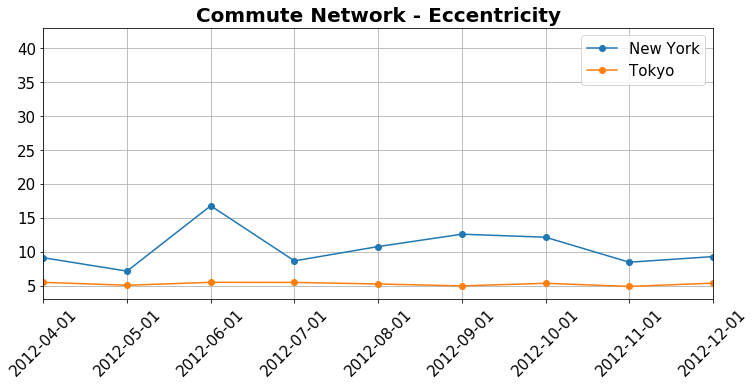

In [77]:
ax = nyc_fmonths2012["mean_eccentricity"].plot(figsize = (12, 5), style = 'o-', rot = 45)

tk_fmonths2012["mean_eccentricity"].plot(figsize = (12, 5), style = 'o-', rot = 45)

# sp_fmonths2012["mean_eccentricity"].plot(figsize = (12, 5), style = 'o-', rot = 45)

ax.grid(True)
ax.set_title("Commute Network - Eccentricity", fontweight = "bold", fontsize = 20)
ax.set_ylim(3, 43)

ax.legend(["New York", "Tokyo"])#, "São Paulo"])

### Diameter

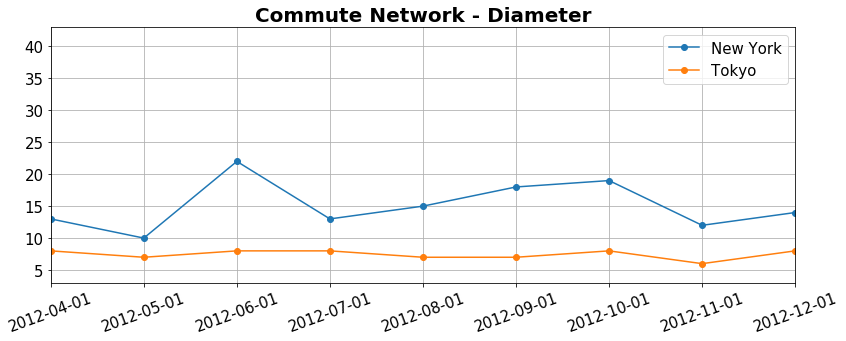

In [44]:
ax = nyc_fmonths2012["diameter"].plot(figsize = (12, 5), style = 'o-', rot = 20)

tk_fmonths2012["diameter"].plot(figsize = (12, 5), style = 'o-', rot = 20)

# sp_fmonths2012["diameter"].plot(figsize = (12, 5), style = 'o-', rot = 45)

ax.grid(True)
ax.set_title("Commute Network - Diameter", fontweight = "bold", fontsize = 20)
ax.set_ylim(3, 43)

ax.legend(["New York", "Tokyo"])#, "São Paulo"])

plt.tight_layout()
plt.savefig("plots/commute/diameter_commute.pdf")

### Betweenness

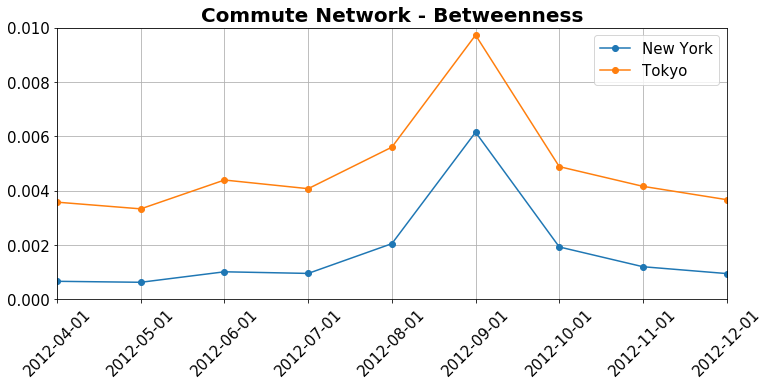

In [113]:
ax = nyc_fmonths2012["mean_betweenness"].plot(figsize = (12, 5), style = 'o-', rot = 45)

tk_fmonths2012["mean_betweenness"].plot(figsize = (12, 5), style = 'o-', rot = 45)

# sp_fmonths2012["mean_betweenness"].plot(figsize = (12, 5), style = 'o-', rot = 45)

ax.grid(True)
ax.set_title("Commute Network - Betweenness", fontweight = "bold", fontsize = 20)
ax.set_ylim(0, 0.01)

ax.legend(["New York", "Tokyo"])#, "São Paulo"])

### Clustering

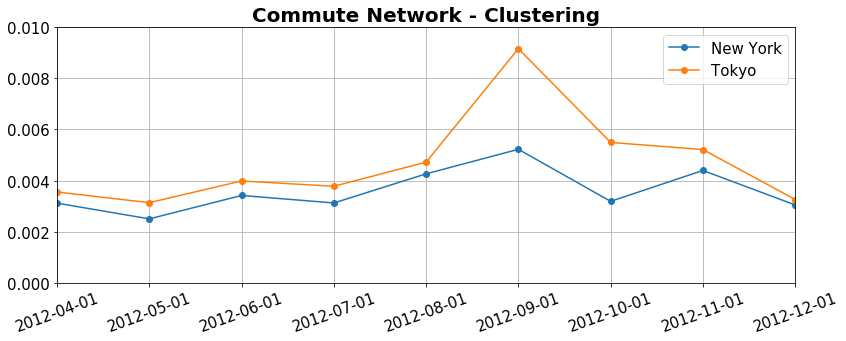

In [40]:
ax = nyc_fmonths2012["mean_clustering"].plot(figsize = (12, 5), style = 'o-', rot = 20)

tk_fmonths2012["mean_clustering"].plot(figsize = (12, 5), style = 'o-', rot = 20)

# sp_fmonths2012["mean_clustering"].plot(figsize = (12, 5), style = 'o-', rot = 45)

ax.grid(True)
ax.set_title("Commute Network - Clustering", fontweight = "bold", fontsize = 20)
ax.set_ylim(0, 0.01)

ax.legend(["New York", "Tokyo"])#, "São Paulo"])

plt.tight_layout()
plt.savefig("plots/commute/clustering_commute.pdf")

### Closeness

In [120]:
def get_closeness(lgraphs):
    
    dg = []
    for date, graph in lgraphs:
        closeness = nx.closeness_centrality(graph, distance = 'weight')
        sequence  = [(n, d) for n, d in c.items()]
        
        dg.append((date, sequence))
        
    return dg

In [121]:
dg = get_closeness(nyc_gmonths2012)

In [122]:
dg

[('Jul 2012',
  [('4ab424b4f964a520117020e3', 0.1955012585006319),
   ('4a5c5fbdf964a5203abc1fe3', 0.23255172412607747),
   ('40749600f964a52051f21ee3', 0.25694726865962597),
   ('4ae0ba11f964a520f98121e3', 0.21120905608610133),
   ('43222200f964a5209b271fe3', 0.1433197385630608),
   ('4b16d62bf964a52027be23e3', 0.21527104868608907),
   ('4a19e9aef964a520717a1fe3', 0.23011842187672937),
   ('49f4b6fdf964a5203d6b1fe3', 0.2376483603446537),
   ('3fd66200f964a52088e31ee3', 0.2020795330198715),
   ('43db5698f964a5208a2e1fe3', 0.0),
   ('4a6731c3f964a520fdc81fe3', 0.15802738099833488),
   ('4af6e841f964a5200a0422e3', 0.22451021590863368),
   ('4b2d7138f964a520c1d624e3', 0.1874962237805652),
   ('49dbfde9f964a5203a5f1fe3', 0.2474397514689085),
   ('4a8fee46f964a520a81520e3', 0.0),
   ('4408540af964a52055301fe3', 0.2543729822667667),
   ('4af22b96f964a52051e621e3', 0.25599943464948716),
   ('4a341ab1f964a520be9b1fe3', 0.20514597013000685),
   ('3fd66200f964a52044e71ee3', 0.19072536358184283),

In [92]:
nyc_months[(nyc_months["Date"] == "Jul 2012") & (nyc_months["VenueID"] == '4ace6c89f964a52078d020e3')]

,UserID,VenueID,Latitude,Longitude,VenueName,CountryCode,City,Date
59815,237354,4ace6c89f964a52078d020e3,40.773839,-73.87122,Airport,US,New York,Jul 2012
60042,201707,4ace6c89f964a52078d020e3,40.773839,-73.87122,Airport,US,New York,Jul 2012
60045,237236,4ace6c89f964a52078d020e3,40.773839,-73.87122,Airport,US,New York,Jul 2012
60146,181401,4ace6c89f964a52078d020e3,40.773839,-73.87122,Airport,US,New York,Jul 2012
60179,260876,4ace6c89f964a52078d020e3,40.773839,-73.87122,Airport,US,New York,Jul 2012
60198,172368,4ace6c89f964a52078d020e3,40.773839,-73.87122,Airport,US,New York,Jul 2012
60218,48348,4ace6c89f964a52078d020e3,40.773839,-73.87122,Airport,US,New York,Jul 2012
60321,259883,4ace6c89f964a52078d020e3,40.773839,-73.87122,Airport,US,New York,Jul 2012
60340,166063,4ace6c89f964a52078d020e3,40.773839,-73.87122,Airport,US,New York,Jul 2012
60393,26163,4ace6c89f964a52078d020e3,40.773839,-73.87122,Airport,US,New York,Jul 2012


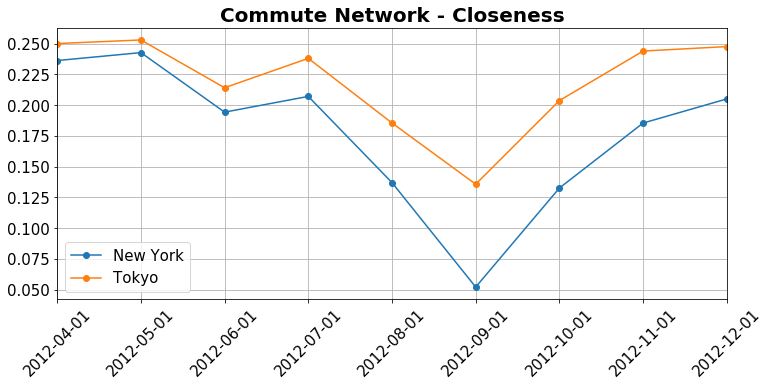

In [81]:
ax = nyc_fmonths2012["mean_closeness"].plot(figsize = (12, 5), style = 'o-', rot = 45)

tk_fmonths2012["mean_closeness"].plot(figsize = (12, 5), style = 'o-', rot = 45)

# sp_fmonths2012["mean_closeness"].plot(figsize = (12, 5), style = 'o-', rot = 45)

ax.grid(True)
ax.set_title("Commute Network - Closeness", fontweight = "bold", fontsize = 20)

ax.legend(["New York", "Tokyo"])#, "São Paulo"])

### Eigenvector

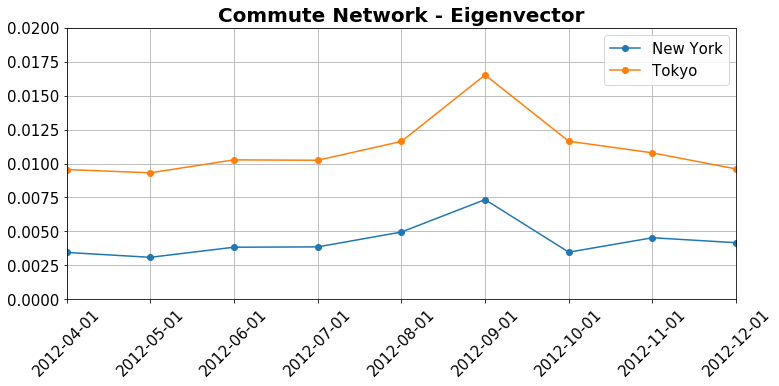

In [117]:
ax = nyc_fmonths2012["mean_eigenvector"].plot(figsize = (12, 5), style = 'o-', rot = 45)

tk_fmonths2012["mean_eigenvector"].plot(figsize = (12, 5), style = 'o-', rot = 45)

# sp_fmonths2012["mean_eigenvector"].plot(figsize = (12, 5), style = 'o-', rot = 45)

ax.grid(True)
ax.set_title("Commute Network - Eigenvector", fontweight = "bold", fontsize = 20)
ax.set_ylim(0, 0.02)

ax.legend(["New York", "Tokyo"])#, "São Paulo"])

### Density

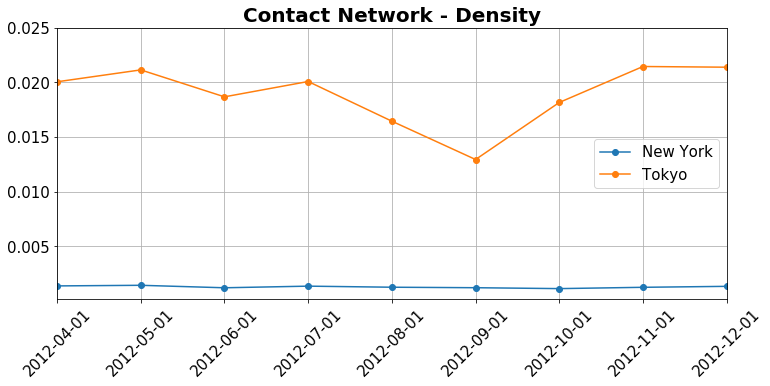

In [31]:
ax = nyc_fmonths2012["density"].plot(figsize = (12, 5), style = 'o-')
# ax1.grid(True)
# ax1.set_title("New York", fontweight = "bold", fontsize = 20)

tk_fmonths2012["density"].plot(figsize = (12, 5), style = 'o-', rot = 45)
# ax2.grid(True)
# ax2.set_title("Tokyo", fontweight = "bold", fontsize = 20)

# sp_fmonths2012["density"].plot(figsize = (12, 5), style = 'o-')
ax.grid(True)
ax.set_title("Contact Network - Density", fontweight = "bold", fontsize = 20)
ax.set_ylim(0.000125, 0.025)

ax.legend(["New York", "Tokyo"])#, "São Paulo"])